#### ALY6140 CAPSTONE, 10/2020
# Natural Resource Protection & Child Health Indicators, 2019 release

## DATA SET
> #### Source: SEDAC https://sedac.ciesin.columbia.edu/data/set/nrmi-natural-resource-protection-child-health-indicators-2019
#### 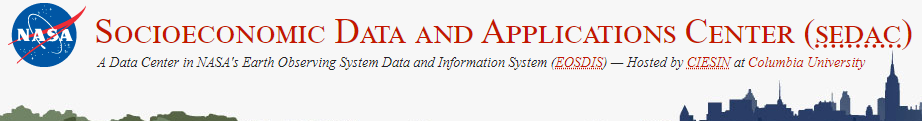

### "The Natural Resource Protection and Child Health Indicators, 2019 Release, is produced in support of the U.S. Millennium Challenge Corporation (MCC) as selection criteria for funding eligibility. 

#### The Natural Resource Protection Indicator (NRPI) and Child Health Indicator (CHI) are based on proximity-to-target scores ranging from 0 to 100 (at target). The NRPI covers 234 countries and is calculated based on the weighted average percentage of biomes under protected status. The CHI is a composite index for 195 countries derived from the average of three proximity-to-target scores for access to at least basic water and sanitation, along with child mortality. 

#### The 2019 release includes a consistent time series of NRPI scores for 2015 to 2019 and CHI scores for 2010 to 2018."

## MCC Initiatives:

### 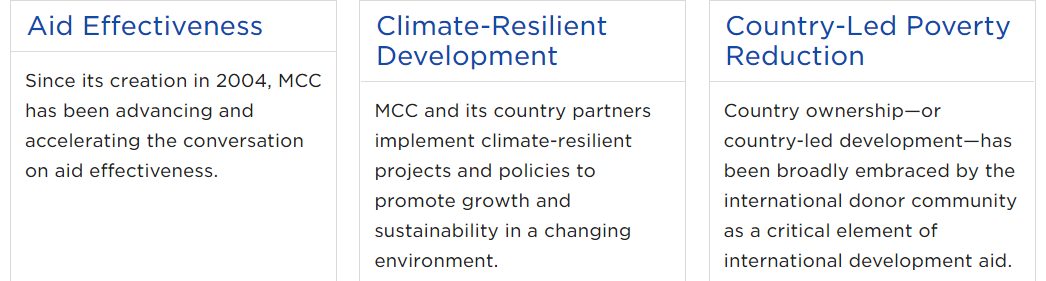

## MCC Initiatives Supported by this analysis:

> ## 1) By Sub-Region, where do Child Health Indicators have the lowest 3 year mean?
> ## 2) Within results, where can relationships be identified between indicators?
> ## 3) Which countries show significant enough indicator relationships to infer future MCC funding?
>> ### Full description of MCC initiatives: https://www.mcc.gov/initiatives



# DATA PREP
#### Steps to clean and/or reshape data

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# bring in Natural Resource Protection Indicator data
# NRPI_v2019_xx
# The Natural Resource Protection Indicator is the proximity to target of 17% protection
# across all biomes on a 0-100 scale (2019 release).
# 100 corresponds to 17% protection across all biomes, and 0 corresponds to zero protection.

resources_df = pd.read_excel('resource_health_indicators.xlsx', sheet_name='NRPI_2019')
resources_df.head(5)

,ISO3,CountryName,NRPI_v2019_15,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,58.964862
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,0.613273
2,AGO,Angola,34.107313,34.107313,34.107313,34.107313,34.107313
3,AIA,Anguilla,3.211881,3.211881,3.211881,3.211881,5.099826
4,ALB,Albania,91.669651,91.669651,91.669651,91.669651,91.669651


In [3]:
# resources_df = pd.read_excel('https://github.com/atxmoon/aly6140_capstone/blob/main/resource_health_indicators.xlsx')
# resources_df.head(2)

In [4]:
# bring in Child Health Indicator data
child_health_df = pd.read_excel('resource_health_indicators.xlsx', sheet_name='CHI_2019')
child_health_df.head(2)

,ISO3,CountryName,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,...,chmort_pt_18,CHI_v2019_10,CHI_v2019_11,CHI_v2019_12,CHI_v2019_13,CHI_v2019_14,CHI_v2019_15,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,25.264712,23.732247,22.256063,20.841731,19.48403,18.218624,17.086026,16.050861,...,78.620829,48.949188,50.954385,52.948497,54.929004,56.898474,58.840417,60.735683,62.603587,63.034354


In [5]:
# data description
# cmr_xx, Deaths of children age 1 to exact age 5 per 1,000 live births in that year (4q1)
# wat_xx, water (raw and proximity to target), 0-100 scale
# san_xx, sanitation (raw and proximity to target), 0-100 scale
# chmort_pt_xx, Probability of dying between age 1 and 5 (4q1) (expressed in chances out of 1,000)
# CHI_v2019_xx, Child Health Indicator, unweighted average of three proximity to target indicators - water, sanitation, and mortality (2019 release)

In [6]:
# keep only series of data for 2016 forward
child_health_df = child_health_df.drop(columns=['cmr_10', 'cmr_11', 'cmr_12', 'cmr_13', 'cmr_14', 'cmr_15', 'wat_10', 'wat_11', 'wat_12', 'wat_13', 'wat_14', 'wat_15', 'san_10', 'san_11', 'san_12', 'san_13', 'san_14', 'san_15', 'chmort_pt_10', 'chmort_pt_11', 'chmort_pt_12', 'chmort_pt_13', 'chmort_pt_14', 'chmort_pt_15', 'CHI_v2019_10', 'CHI_v2019_11', 'CHI_v2019_12', 'CHI_v2019_13', 'CHI_v2019_14', 'CHI_v2019_15'])
child_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 17 columns):
ISO3            230 non-null object
CountryName     230 non-null object
cmr_16          195 non-null float64
cmr_17          195 non-null float64
cmr_18          195 non-null float64
wat_16          229 non-null float64
wat_17          229 non-null float64
wat_18          229 non-null float64
san_16          224 non-null float64
san_17          221 non-null float64
san_18          221 non-null float64
chmort_pt_16    195 non-null float64
chmort_pt_17    195 non-null float64
chmort_pt_18    195 non-null float64
CHI_v2019_16    195 non-null float64
CHI_v2019_17    195 non-null float64
CHI_v2019_18    195 non-null float64
dtypes: float64(15), object(2)
memory usage: 30.7+ KB


In [7]:
# Join Natural Resource & Child Health data on ISO3
df = resources_df.merge(child_health_df, left_on='ISO3', right_on='ISO3')
df = df.drop(columns=['NRPI_v2019_15'])
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,wat_18,san_16,san_17,san_18,chmort_pt_16,chmort_pt_17,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,97.869023,97.543481,97.543481,97.543481,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,67.064623,42.054183,43.417610,43.417610,75.866382,77.328529,78.620829,60.735683,62.603587,63.034354


In [8]:
# add series for 3 year NRPI mean
col = df.loc[: , "NRPI_v2019_16":"NRPI_v2019_18"]
df['nrpi_mean'] = col.mean(axis=1)
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,san_16,san_17,san_18,chmort_pt_16,chmort_pt_17,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18,nrpi_mean
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,97.543481,97.543481,97.543481,NaN,NaN,NaN,NaN,NaN,NaN,58.964862
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,42.054183,43.417610,43.417610,75.866382,77.328529,78.620829,60.735683,62.603587,63.034354,0.613273


In [9]:
# add series for 3 year CMR mean
# add series for 3 year WAT mean
# add series for 3 year SAN mean
# add series for 3 year CHMORT mean
# add series for 3 year CHI mean

col = df.loc[: , "cmr_16":"cmr_18"]
df['cmr_mean'] = col.mean(axis=1)

col = df.loc[: , "wat_16":"wat_18"]
df['wat_mean'] = col.mean(axis=1)

col = df.loc[: , "san_16":"san_18"]
df['san_mean'] = col.mean(axis=1)

col = df.loc[: , "chmort_pt_16":"chmort_pt_18"]
df['chmort_pt_mean'] = col.mean(axis=1)

col = df.loc[: , "CHI_v2019_16":"CHI_v2019_18"]
df['CHI_mean'] = col.mean(axis=1)

df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,78.620829,60.735683,62.603587,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541


In [10]:
# bring in dataset that adds regional/geographic grouping by ISO3
temp_df = pd.read_csv('https://datahub.io/core/country-codes/r/country-codes.csv')
temp_df.head(2)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,NaN,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2


In [11]:
# keep only series for regional/geographic grouping
temp_df = temp_df[['ISO3166-1-Alpha-3', 'Region Name', 'Sub-region Name']]
temp_df

,ISO3166-1-Alpha-3,Region Name,Sub-region Name
0,TWN,NaN,NaN
1,AFG,Asia,Southern Asia
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia
...,...,...,...
245,ESH,Africa,Northern Africa
246,YEM,Asia,Western Asia
247,ZMB,Africa,Sub-Saharan Africa
248,ZWE,Africa,Sub-Saharan Africa


In [12]:
# Join Natural Resource & Child Health data with Country/Regional Grouping on ISO3
df = df.merge(temp_df, left_on='ISO3', right_on='ISO3166-1-Alpha-3')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 31 columns):
ISO3                 224 non-null object
CountryName_x        224 non-null object
NRPI_v2019_16        224 non-null float64
NRPI_v2019_17        224 non-null float64
NRPI_v2019_18        224 non-null float64
NRPI_v2019_19        224 non-null float64
CountryName_y        224 non-null object
cmr_16               195 non-null float64
cmr_17               195 non-null float64
cmr_18               195 non-null float64
wat_16               223 non-null float64
wat_17               223 non-null float64
wat_18               223 non-null float64
san_16               219 non-null float64
san_17               216 non-null float64
san_18               216 non-null float64
chmort_pt_16         195 non-null float64
chmort_pt_17         195 non-null float64
chmort_pt_18         195 non-null float64
CHI_v2019_16         195 non-null float64
CHI_v2019_17         195 non-null float64
CHI_v2019_18    

In [13]:
df = df.drop(columns=['CountryName_y', 'ISO3166-1-Alpha-3'])
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,cmr_16,cmr_17,cmr_18,wat_16,...,CHI_v2019_17,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean,Region Name,Sub-region Name
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,NaN,NaN,NaN,97.869023,...,NaN,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN,Americas,Latin America and the Caribbean
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,17.086026,16.050861,15.135943,64.286484,...,62.603587,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541,Asia,Southern Asia


In [14]:
# come back to this
# df.rename(columns={"CountryName_x": "Country", "NRPI_v2019_15": "NRPI_2015", ""})

# DATA VISUALIZATION

## Descriptive Analytics

> ### By Region, where are the lowest Child Health Indicators by 3 year mean?

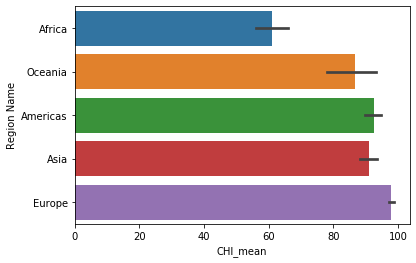

In [15]:
sns.barplot(x="CHI_mean", y="Region Name", data=df.sort_values("CHI_mean"))

> ### By Sub-Region, where are the lowest Child Health Indicators by 3 year mean?

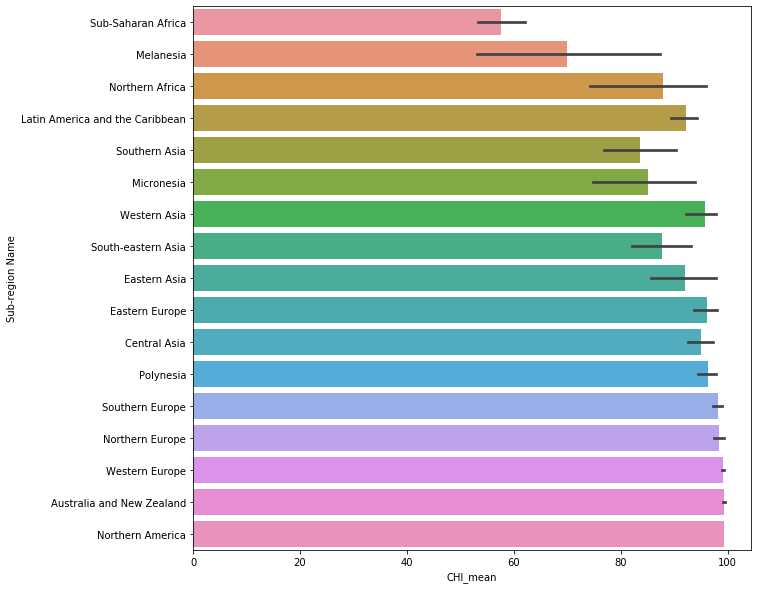

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x="CHI_mean", y="Sub-region Name", data=df.sort_values("CHI_mean"))

> ### By Sub-Region, where is the CHI mean skewed by outliers?

<Figure size 720x720 with 0 Axes>

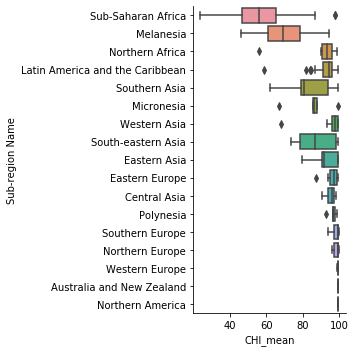

In [17]:
plt.figure(figsize=(10,10))
sns.catplot(data=df.sort_values("CHI_mean"), orient="h", kind="box", x="CHI_mean", y="Sub-region Name")

>> ### Subset of Sub-Regions with low CHI: Sub-Saharan Africa, Melanesia, Northern Africa, LATAM, Southern Asia, Micronesia (keeps 6 of 17)

In [18]:
# create subset_df with sub regions of focus
subset = ['Sub-Saharan Africa', 'Melanesia', 'Northern Africa', 'Latin America and the Caribbean', 'Southern Asia', 'Micronesia']
subset_df = df.loc[df['Sub-region Name'].isin(subset)]
subset_df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,cmr_16,cmr_17,cmr_18,wat_16,...,CHI_v2019_17,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean,Region Name,Sub-region Name
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,NaN,NaN,NaN,97.869023,...,NaN,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN,Americas,Latin America and the Caribbean
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,17.086026,16.050861,15.135943,64.286484,...,62.603587,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541,Asia,Southern Asia


In [ ]:
> ### Within results of lowest CHI mean, where can significant relationships between 2018 Child Health & 2018 Natural Resource Protection indicators be identified?

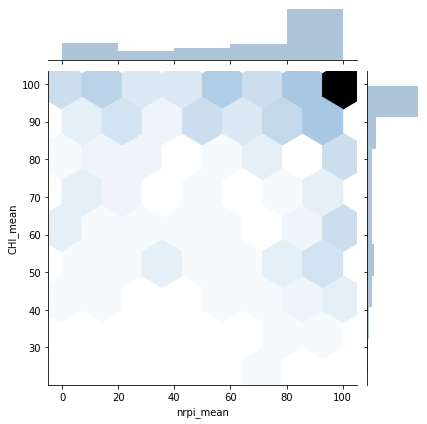

In [19]:
# jointplot with all data
# multivariate distribution
sns.jointplot(x="nrpi_mean", y="CHI_mean", kind="hex", color="#356ea0", data=df)

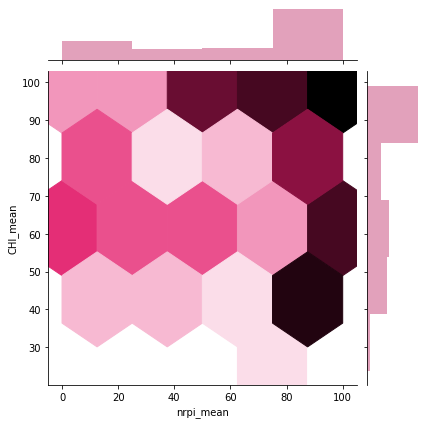

In [20]:
# jointplot with subset data
# multivariate distribution
sns.jointplot(x="nrpi_mean", y="CHI_mean", kind="hex", color="#b71656", data=subset_df)

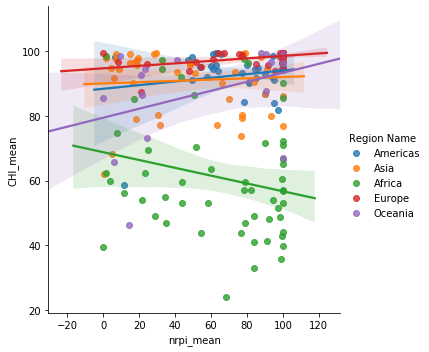

In [28]:
sns.lmplot(x="nrpi_mean", y="CHI_mean", hue="Region Name", data=df)

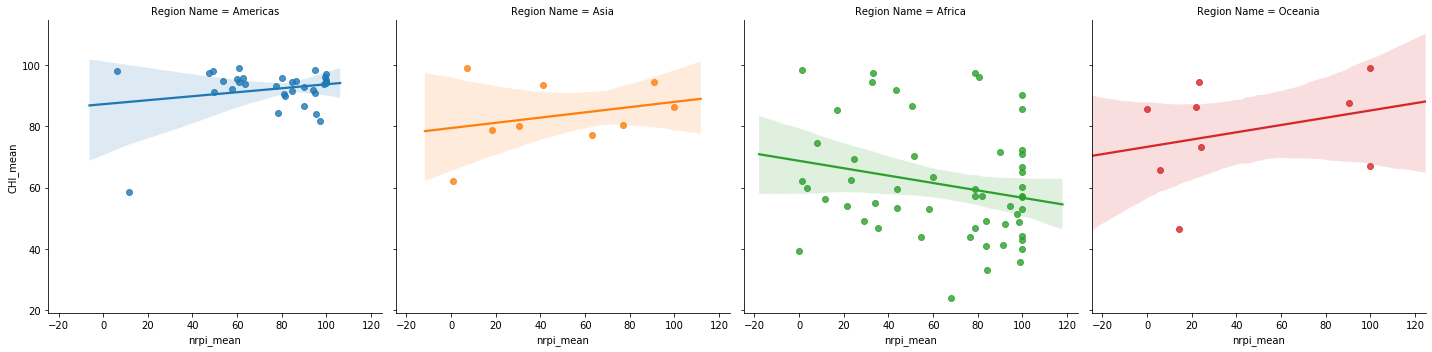

In [35]:
sns.lmplot(x="nrpi_mean", y="CHI_mean", hue="Region Name", col="Region Name", data=subset_df)

# Predictive Analytics

> ### Which countries show significant enough indicator relationships to make inferences about where MCC funding will needed in the future?

> ## At the country level, are there noteworthy instances where Child Health may be impacted by a significant loss of one specific resource? 
> ## What data could be pulled in to perform deeper country specific analysis/impact of mining other economic resources, etc.

# What conclusions can be drawn from this analysis?

# CITATION
## Natural Resource & Child Health Indicators
> ##  Center for International Earth Science Information Network (CIESIN), Columbia University. 2019. Natural Resource Protection and Child Health Indicators, 2019 Release. Palisades, NY: NASA Socioeconomic Data and Applications Center. https://doi.org/10.7927/r6mv-sv82. Accessed 16 OCT 2020.

## Regional Country Grouping Data

### 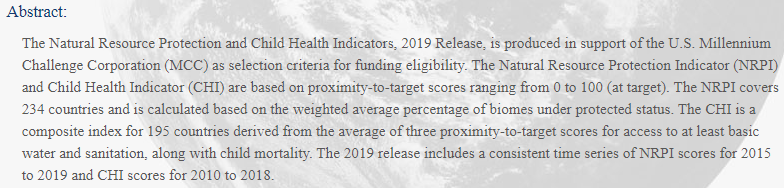

> #### SEDAC Collection:
## 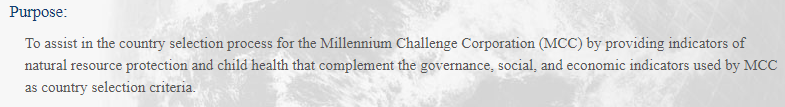